# Python Jupyter Notebook
### Data 642 - Advanced Machine Learning
### Sperow, Cassandra 

## Goal:  Exploratory Data Analysis of Bacteria Densities in Coral Data used in Data 793

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#ac_data = pd.read_csv("/Users/kasan/AU My Drive/001__DATA_793/R_dir_Corals_/output/ac_clr_df.csv")
ac_data = pd.read_csv("../output/ac_clr_df.csv")

In [3]:
ac_data.shape

(767, 1008)

In [4]:
ac_data.head()

,ITS2_type,Clade,Majority,sample_id,its2_count,species,region,reef,ASV0001,ASV0002,...,ASV10768,ASV1077,ASV10777,ASV10779,ASV10780,ASV10782,ASV10783,ASV10784,ASV10785,ASV10787
0,84880,C,C72,SYAN-R1-13,10126,S,YAN,R1,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,85463,C,C21,SMAQ-R2-27,2917,S,MAQ,R2,0.743775,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,85463,C,C21,SMAQ-R1-24,6904,S,MAQ,R1,5.254732,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,85585,A,A1/A1c,PYAN-R1-7,12603,P,YAN,R1,2.317323,5.737356,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,85464,C,C72,SYAN-R1-30,10802,S,YAN,R1,2.953515,-0.288476,...,0.0,0.0,0.0,-2.853425,0.0,0.0,0.0,0.0,0.0,0.0


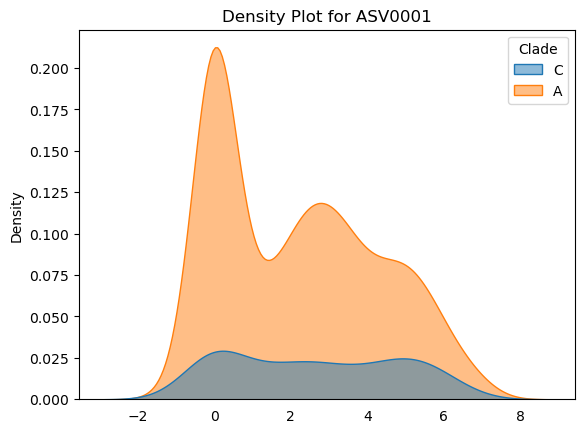

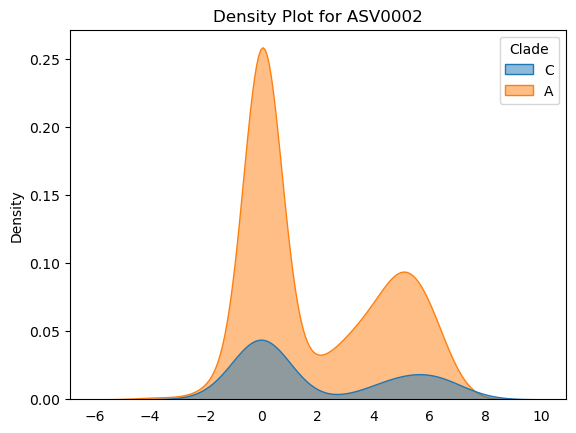

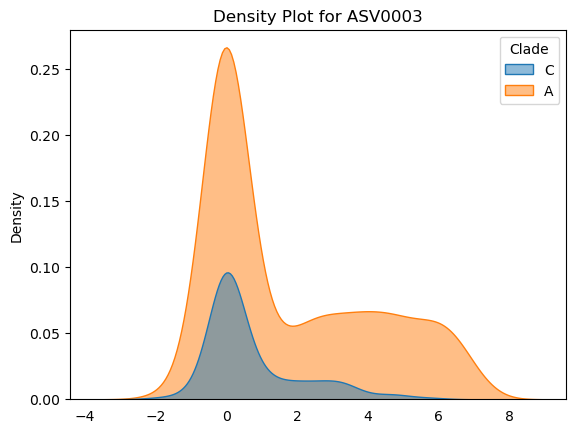

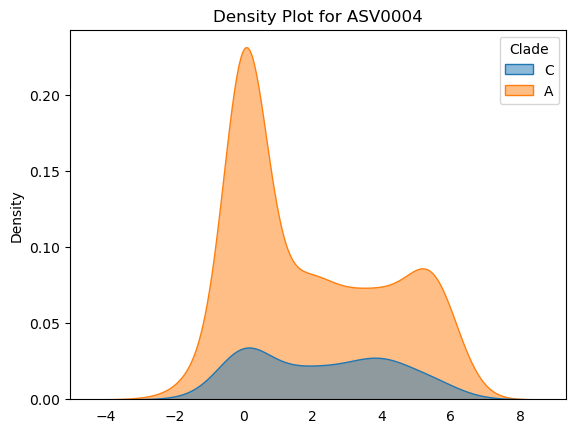

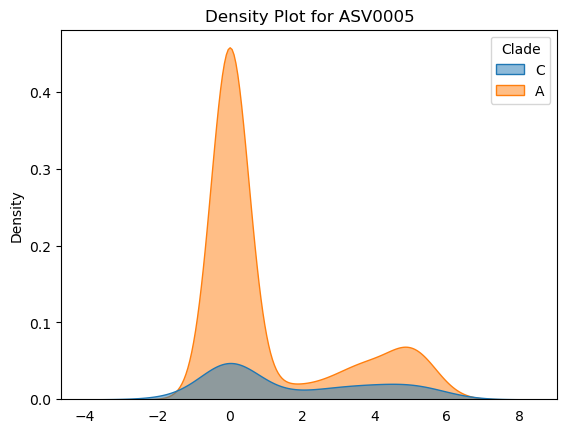

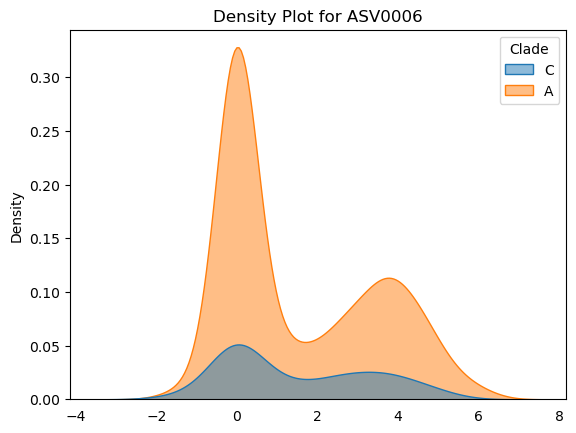

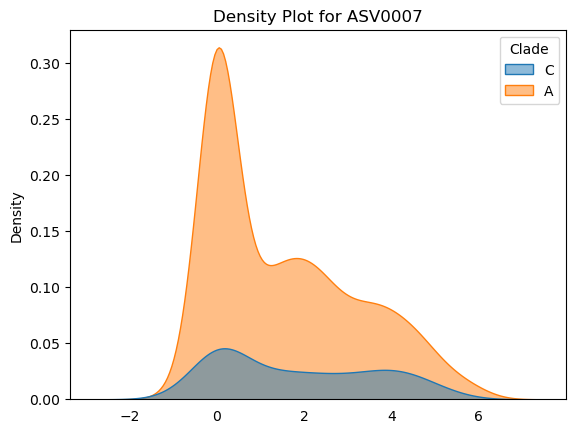

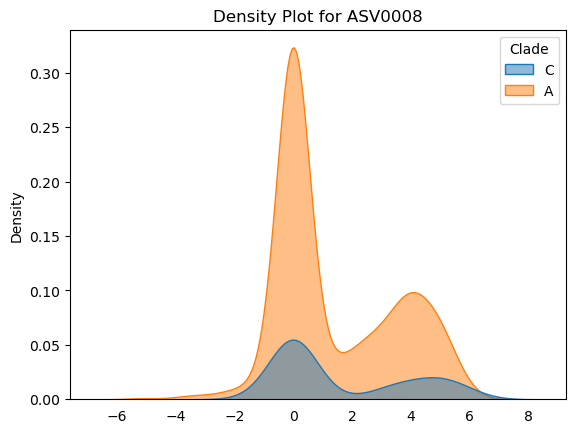

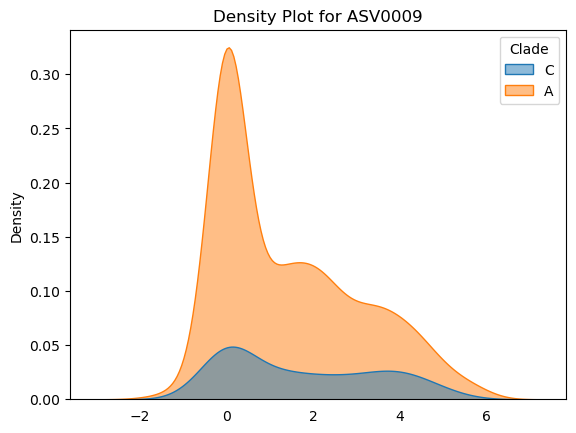

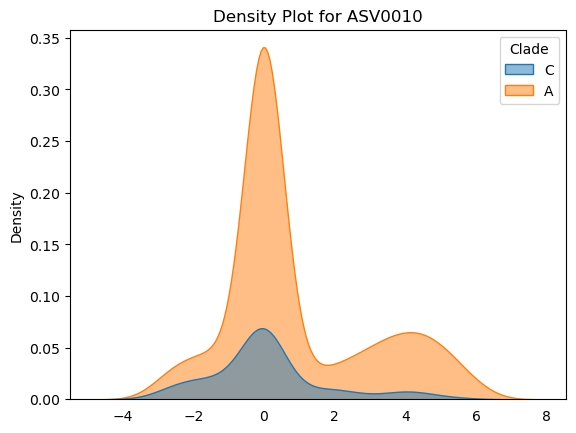

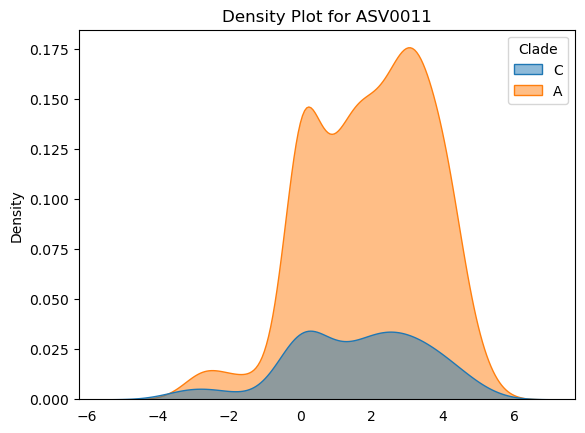

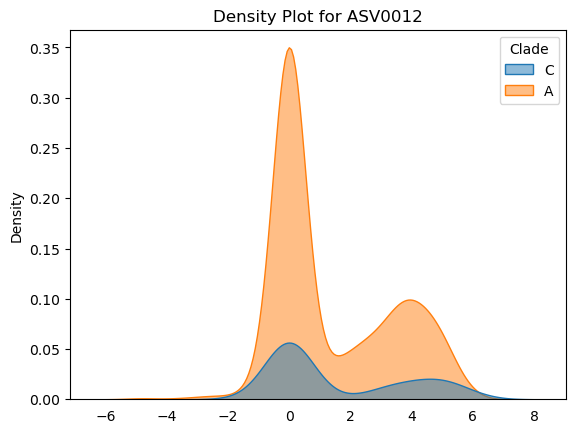

In [6]:
# Create density plots for first 20 ASV numeric columns
for var in ac_data.columns[8:20]:
    plt.figure()
    sns.kdeplot(data=ac_data, x=var, hue='Clade', fill=True, alpha=0.5)
    plt.title(f'Density Plot for {var}')
    plt.xlabel('')
    plt.tick_params(axis='x', which='both', bottom=False, top=False)  # Remove x-axis ticks
    plt.show()

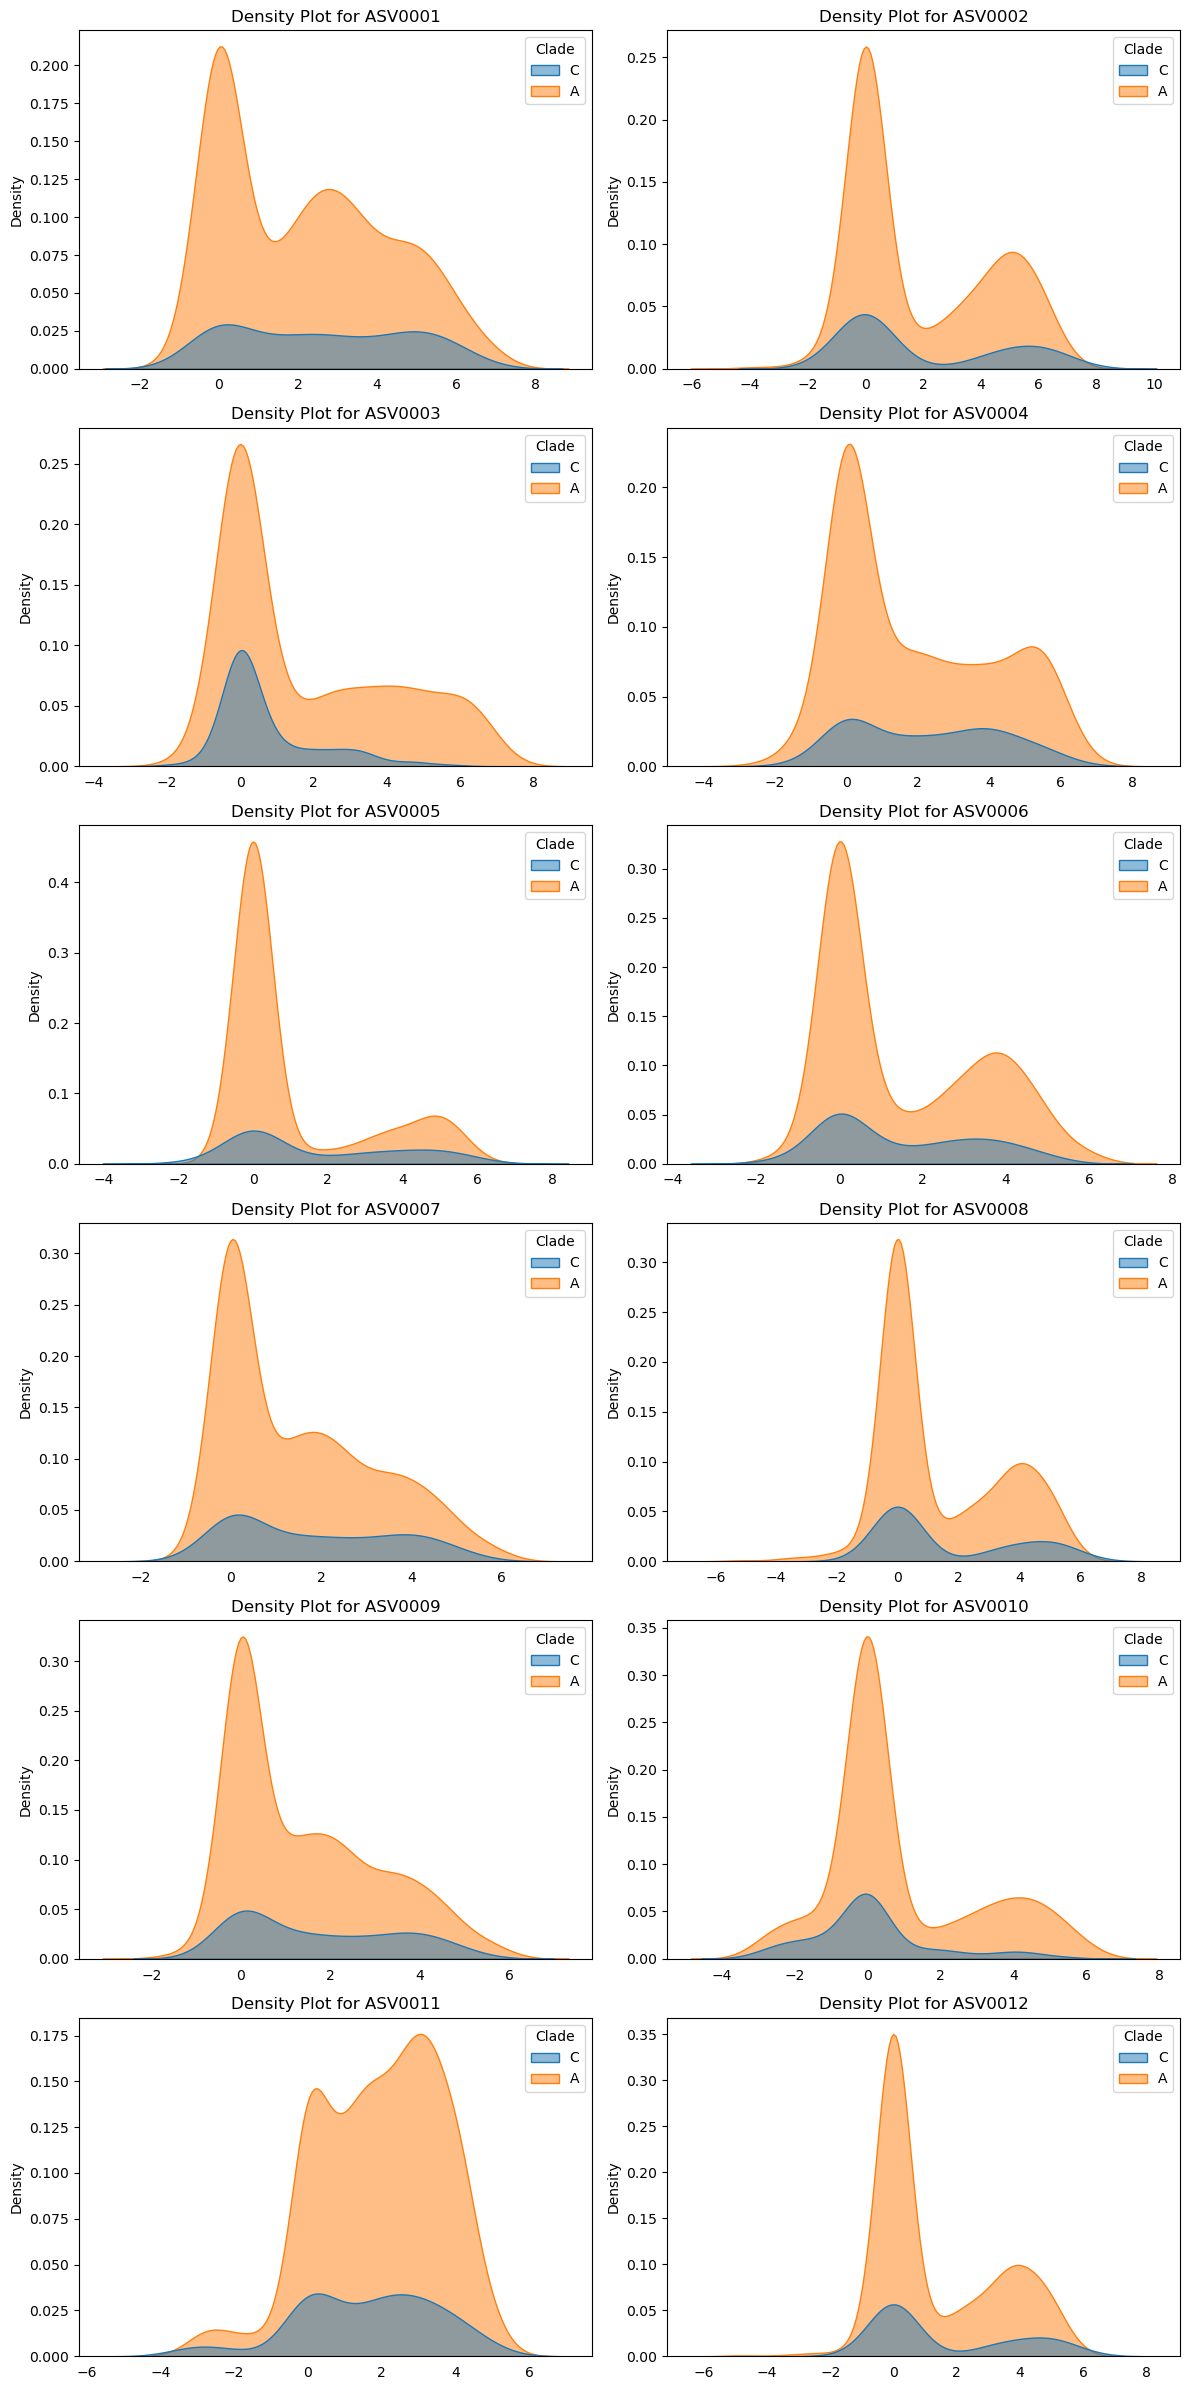

In [9]:
# Create density plots for each numeric column
numeric_columns = ac_data.columns[8:20]
num_plots = len(numeric_columns)
num_rows = (num_plots // 2) + (num_plots % 2)  # Calculate the number of rows needed

# Set up subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 4*num_rows))

# Flatten the 2D array of axes for easier iteration
axes = axes.flatten()

# Create density plots and arrange them in the grid
for i, var in enumerate(numeric_columns):
    sns.kdeplot(data=ac_data, x=var, hue='Clade', fill=True, alpha=0.5, ax=axes[i])
    axes[i].set_title(f'Density Plot for {var}')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', which='both', bottom=False, top=False)  # Remove x-axis ticks

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('../plots/AC_1-12_grid_plots.png')  # Replace 'grid_plots.png' with your desired file name

plt.show()

## Create Batches of Grid Plots for First 100 or so ASVs

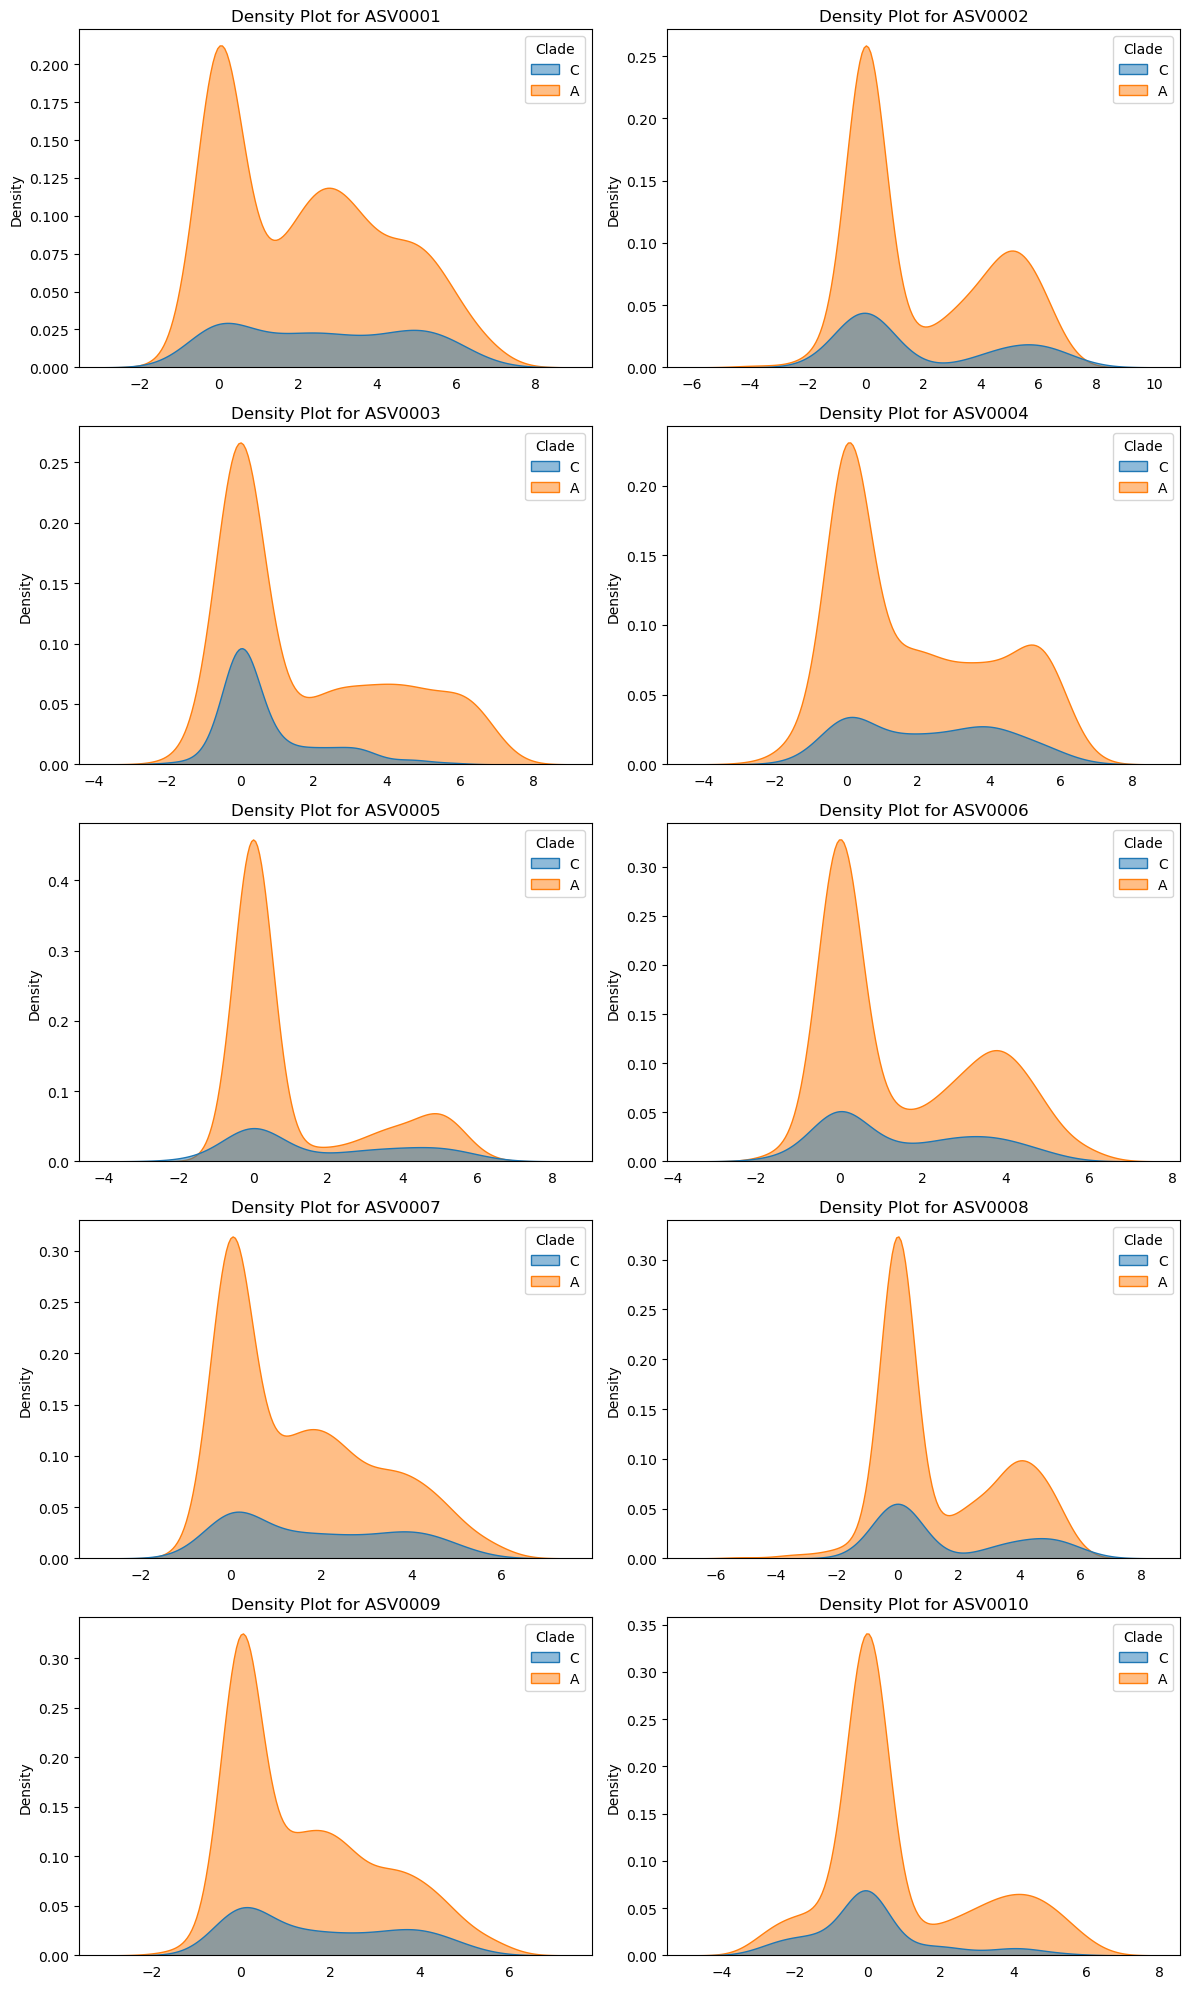

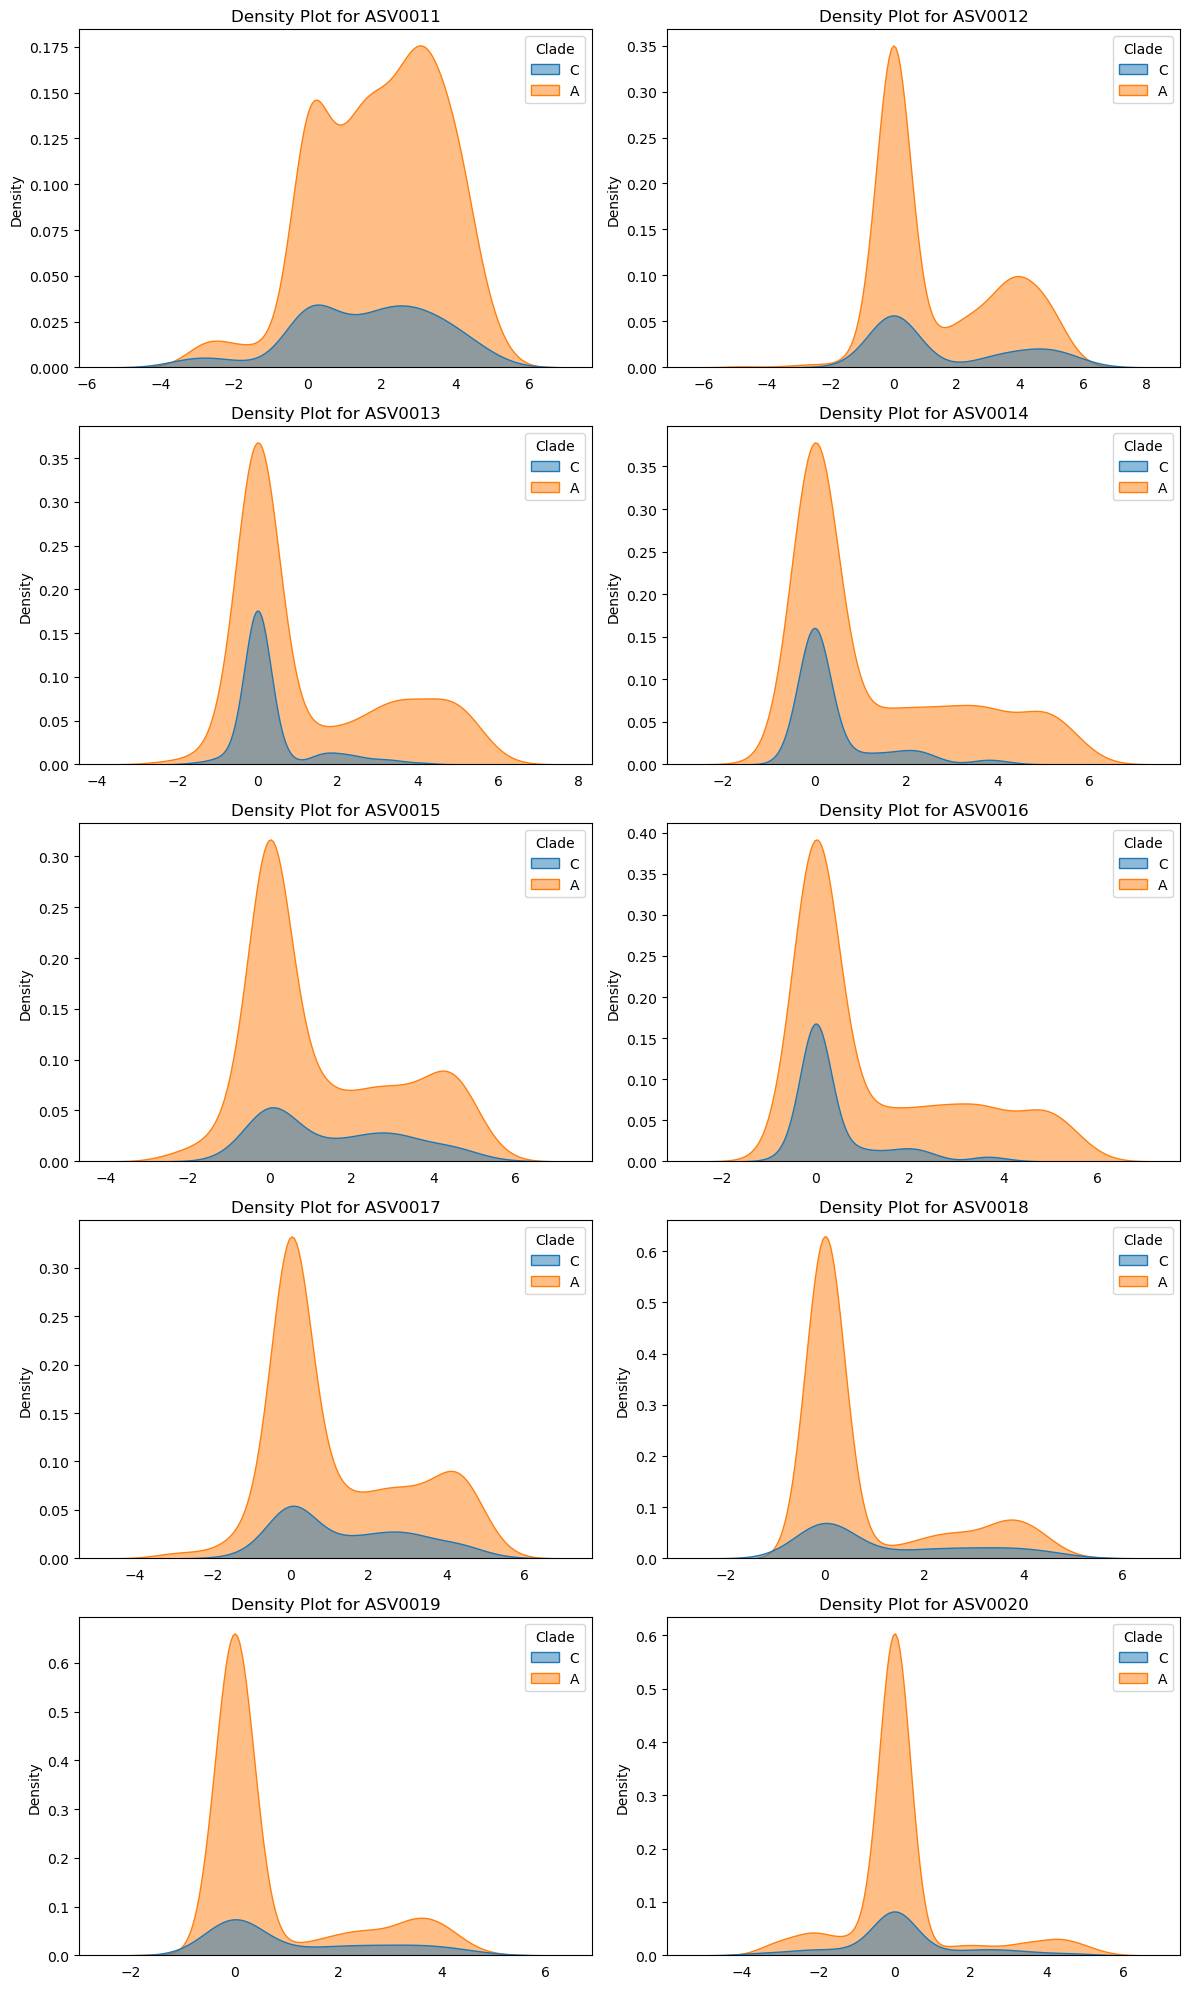

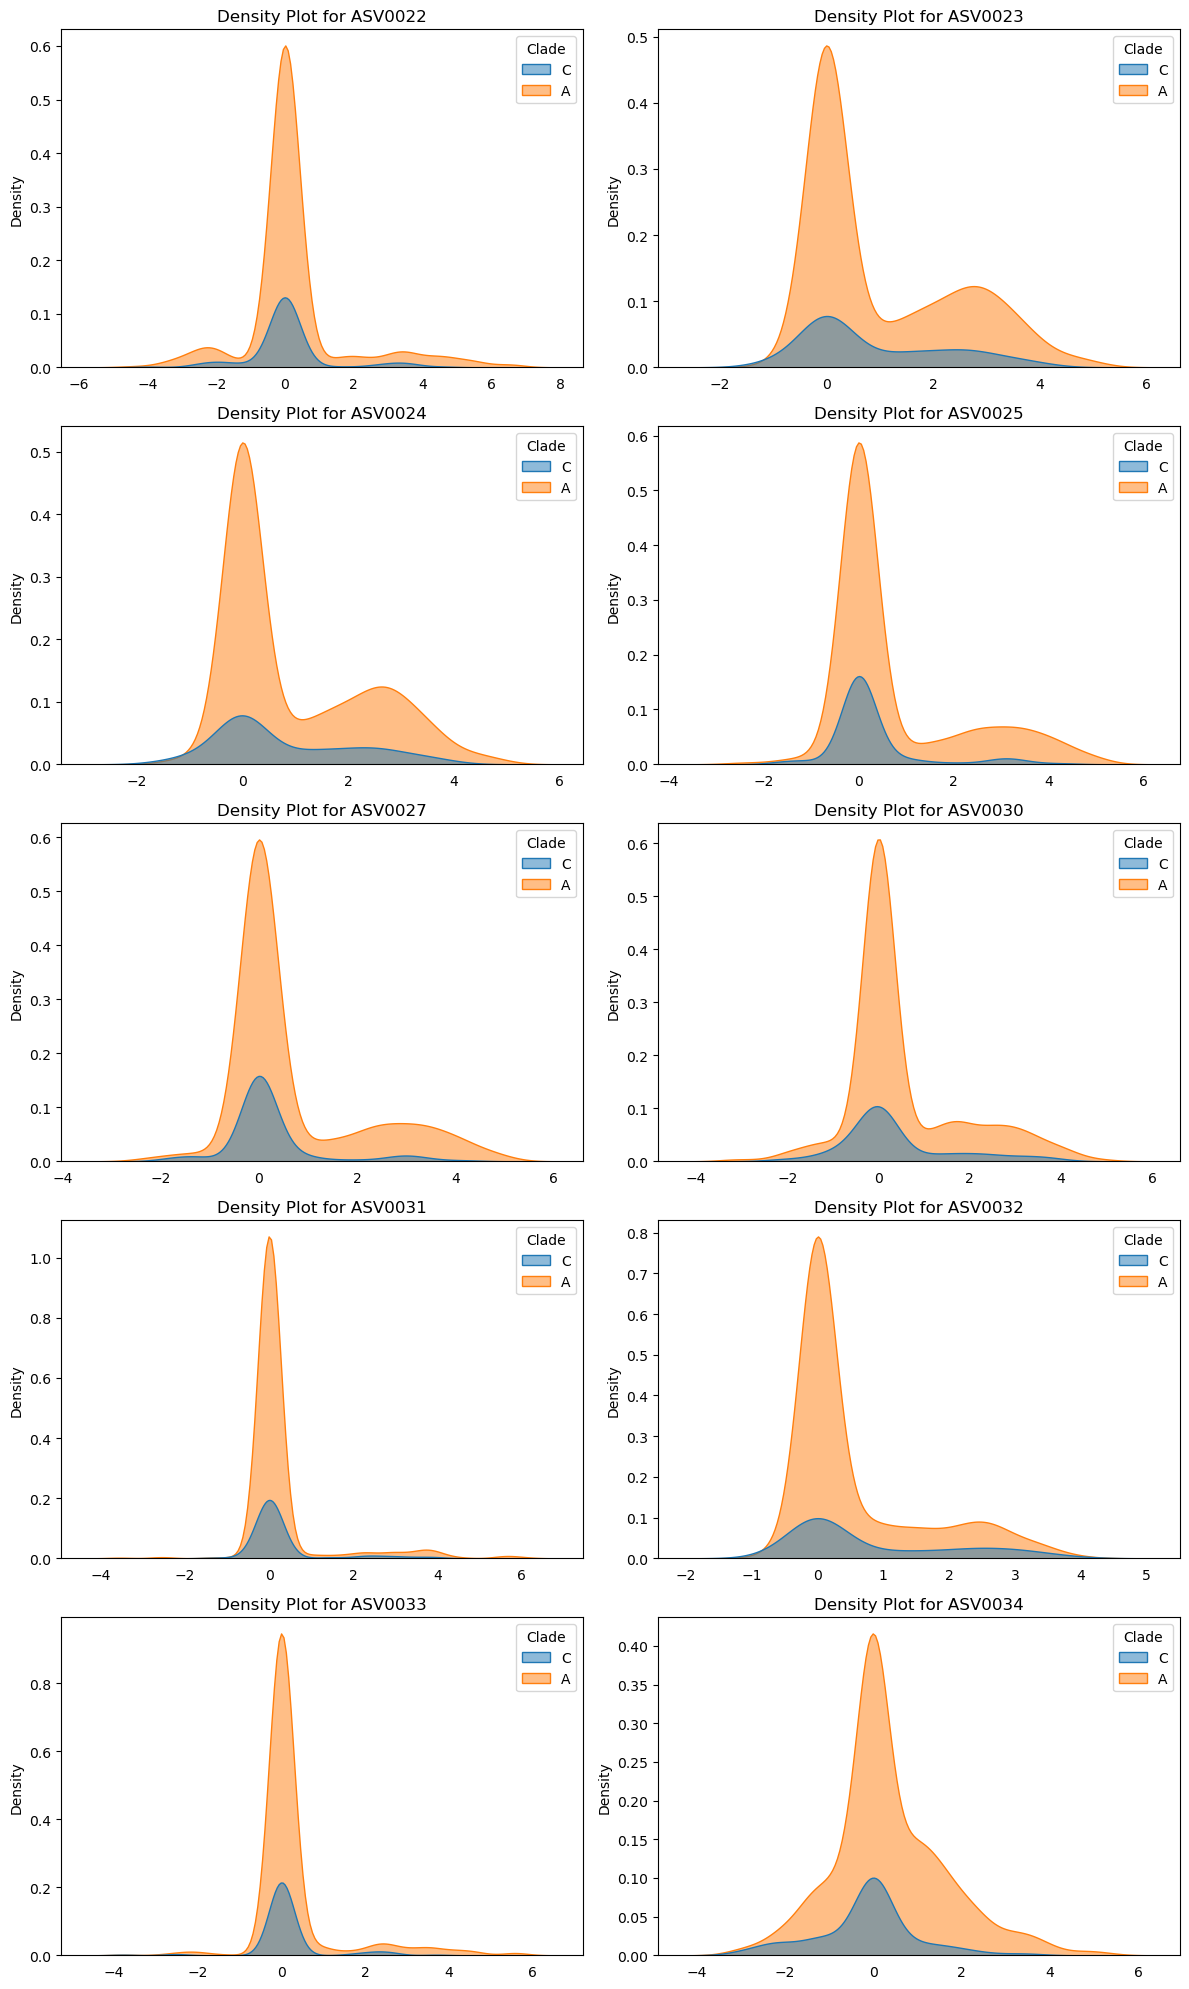

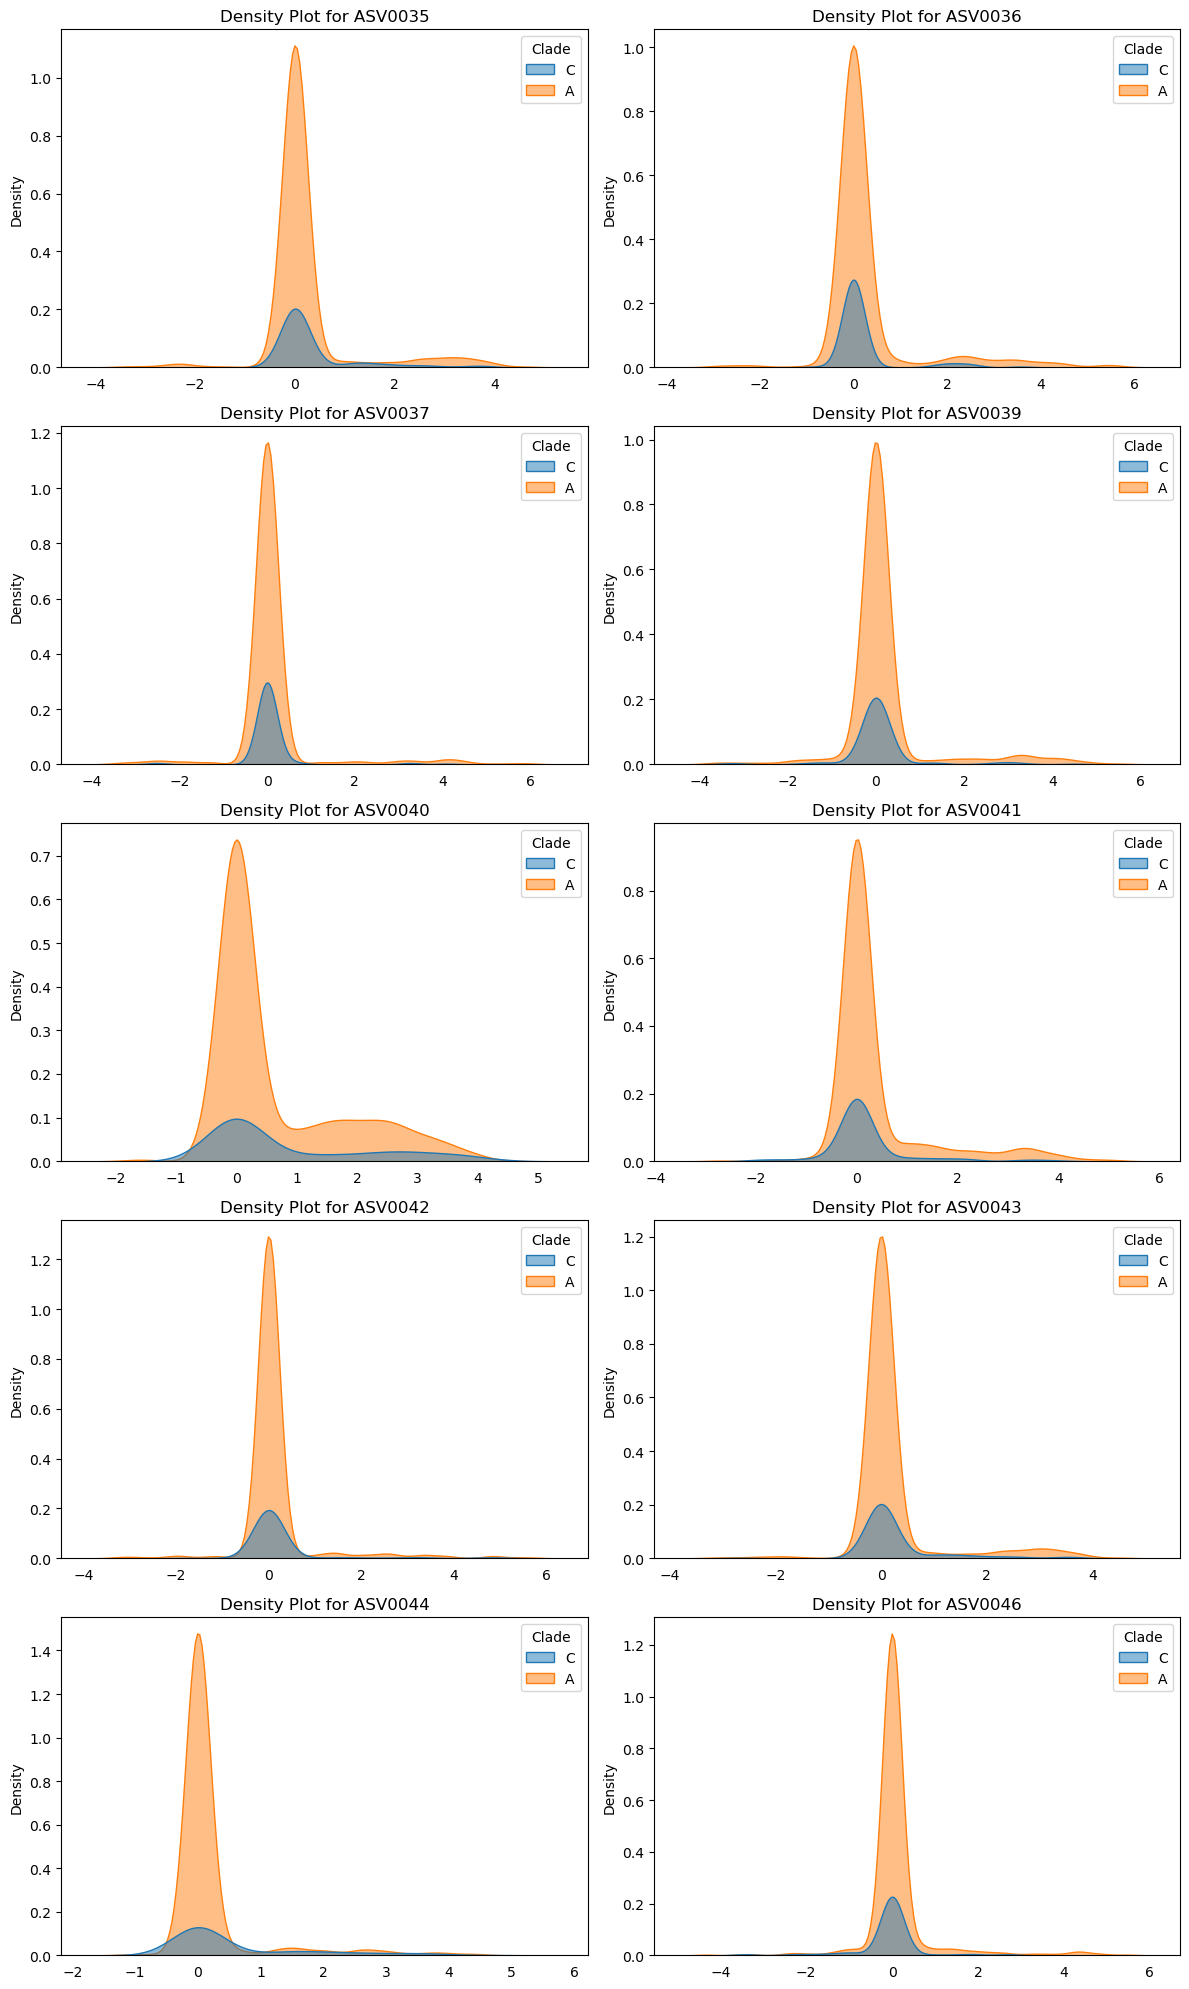

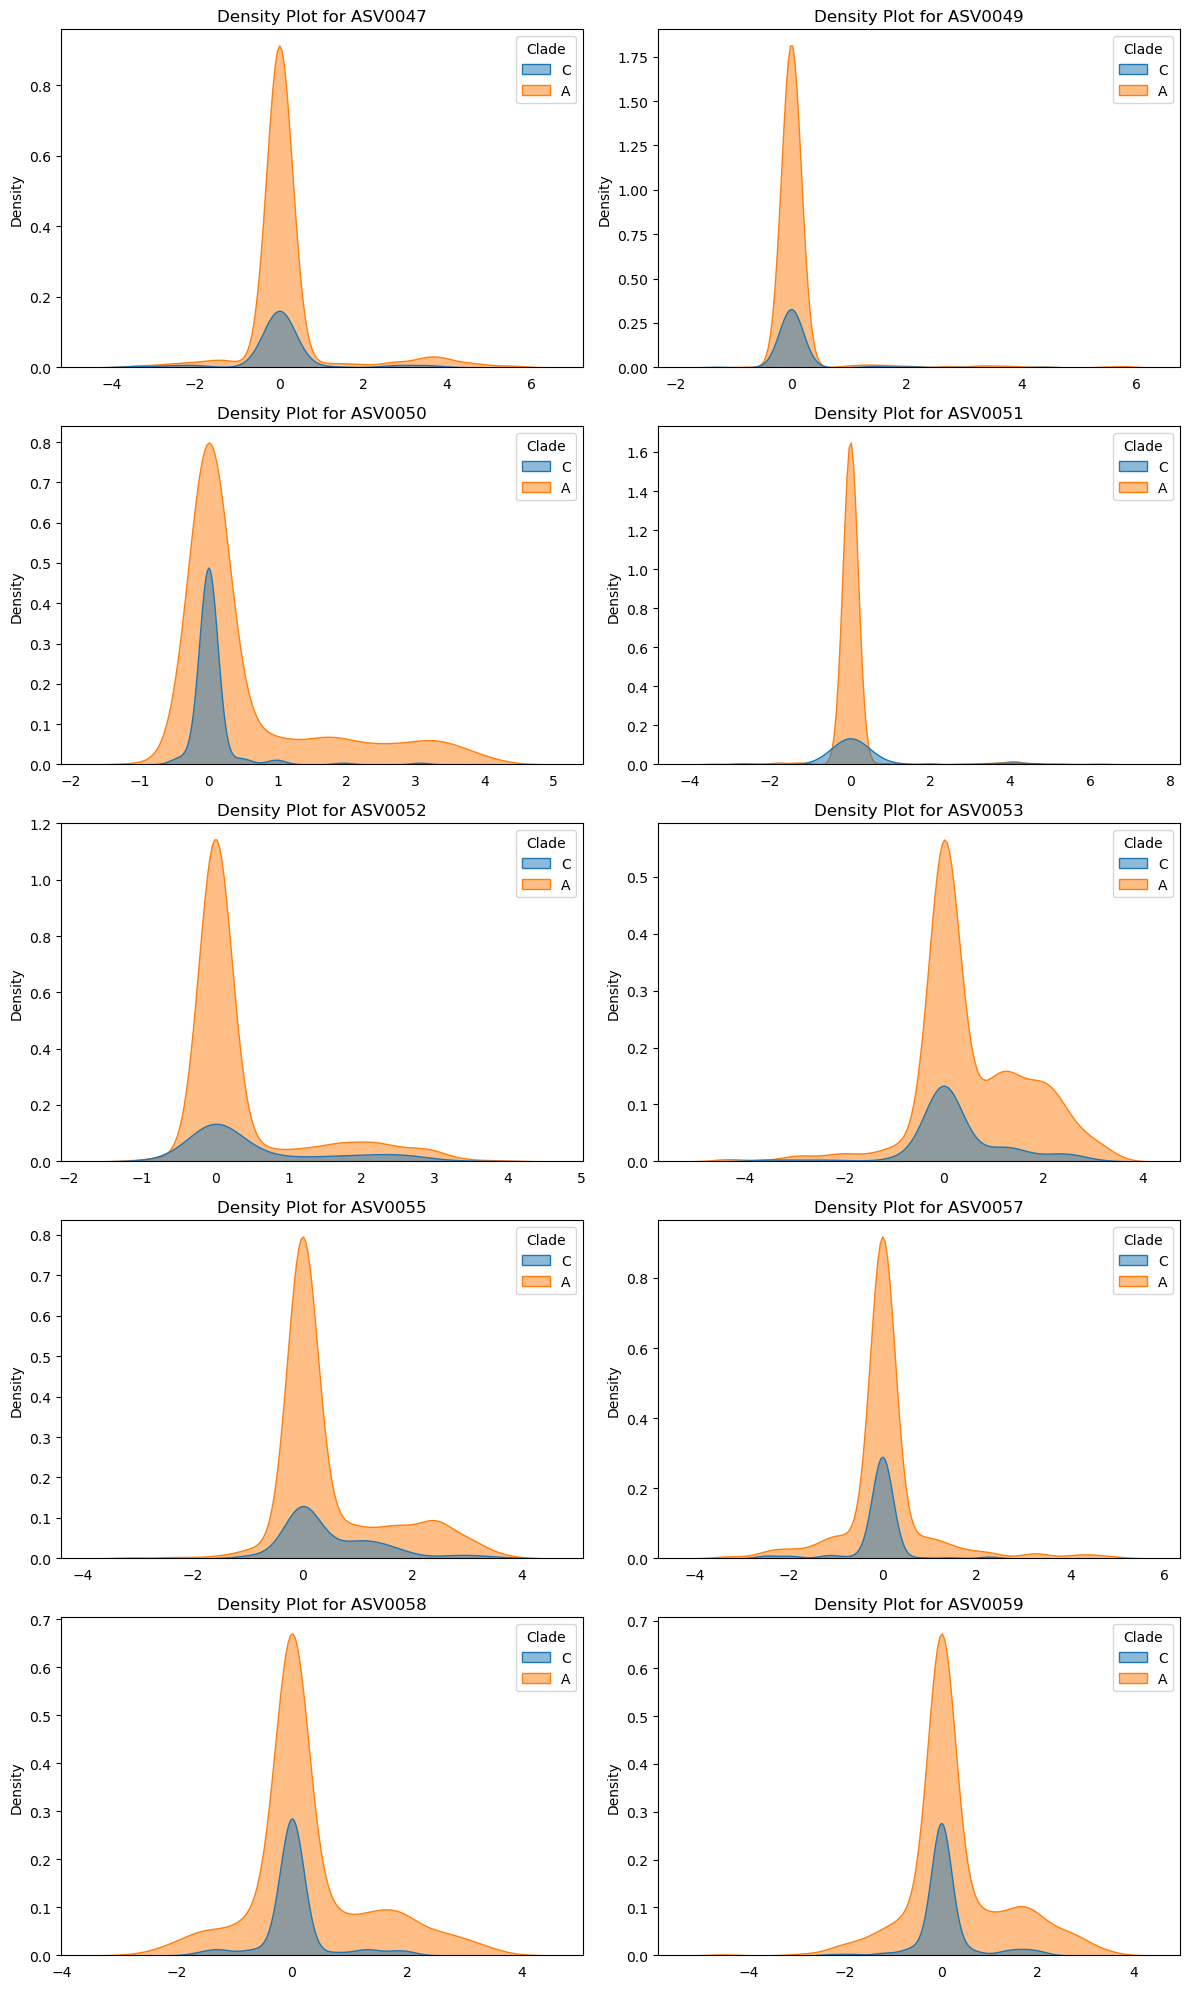

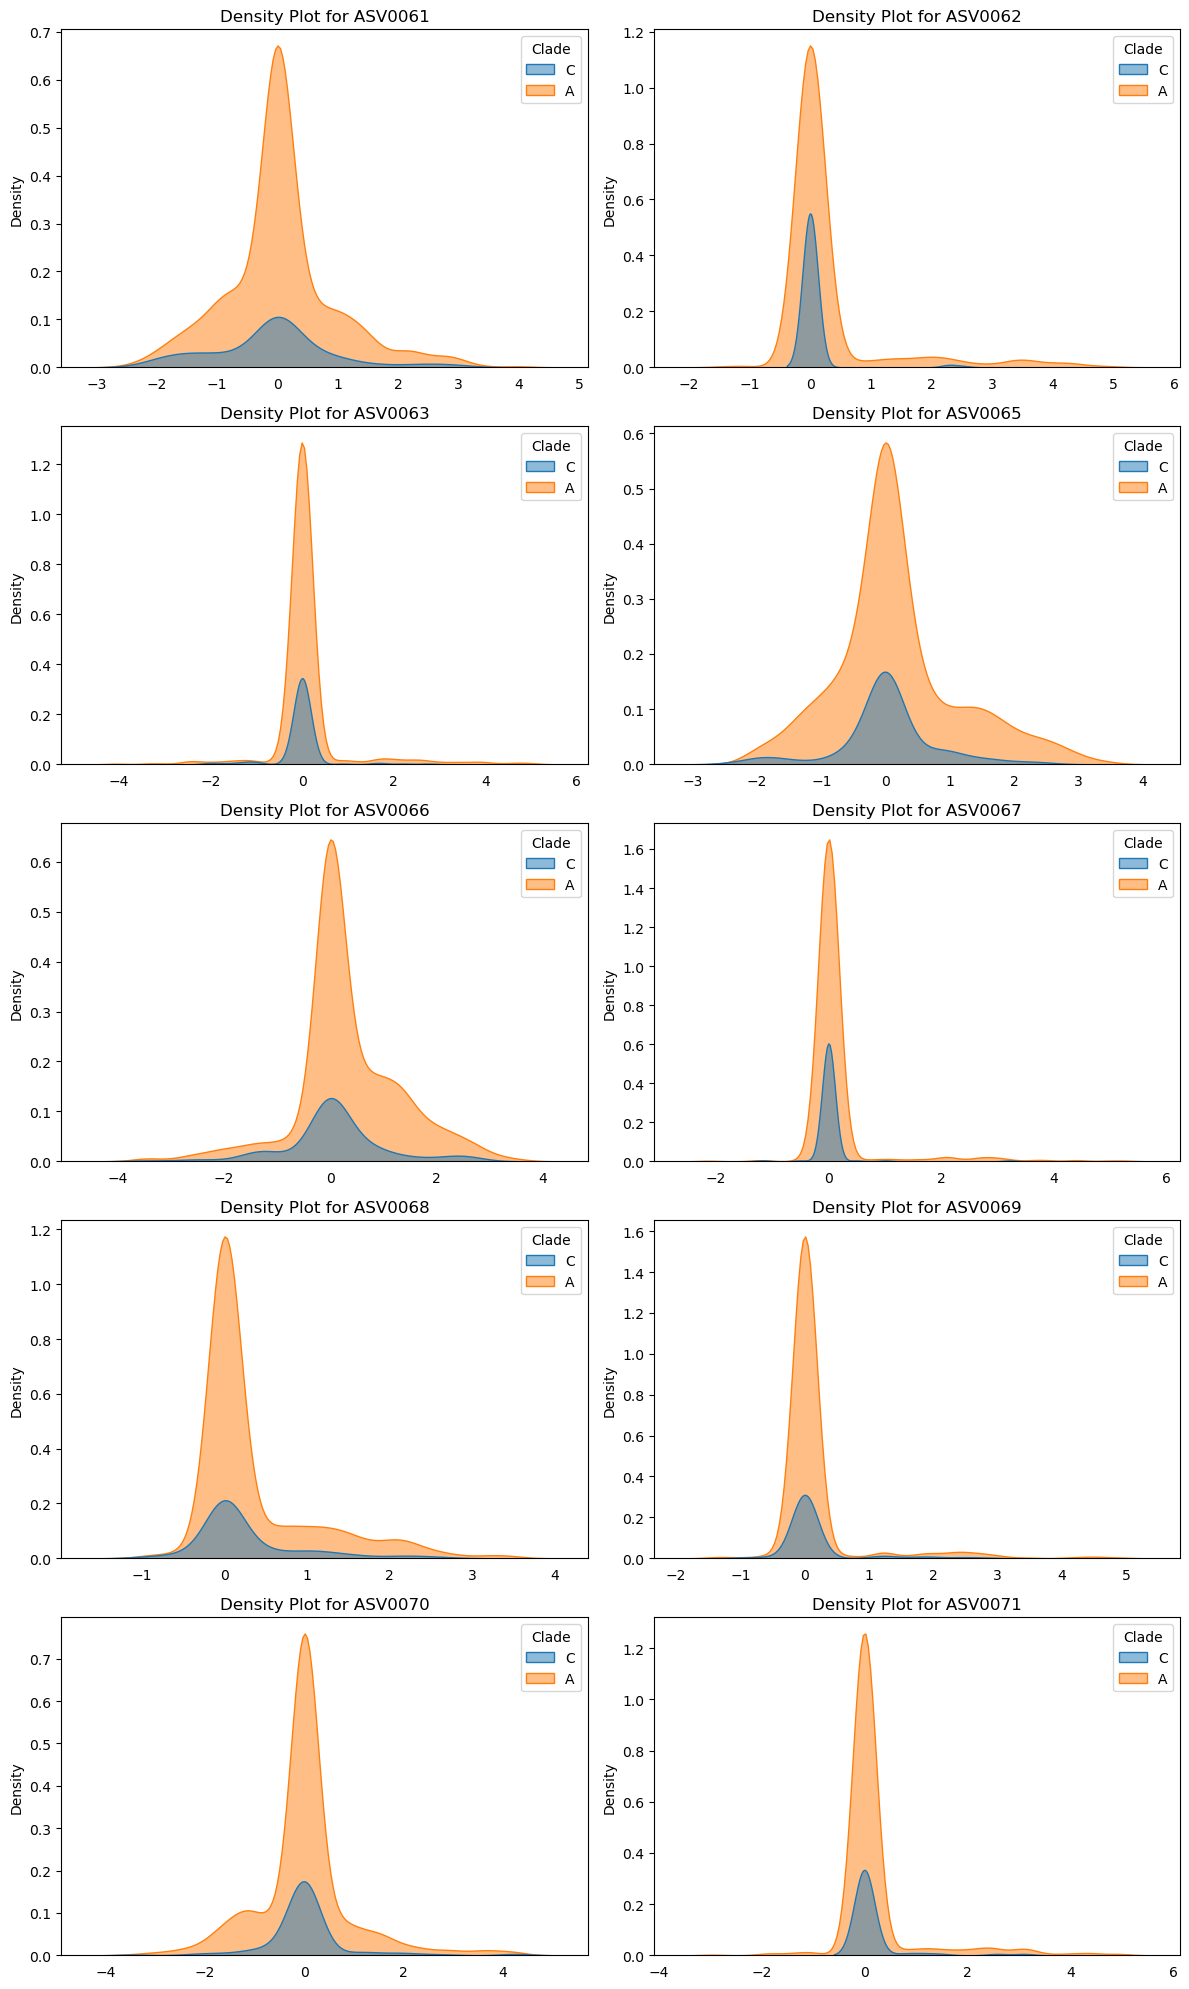

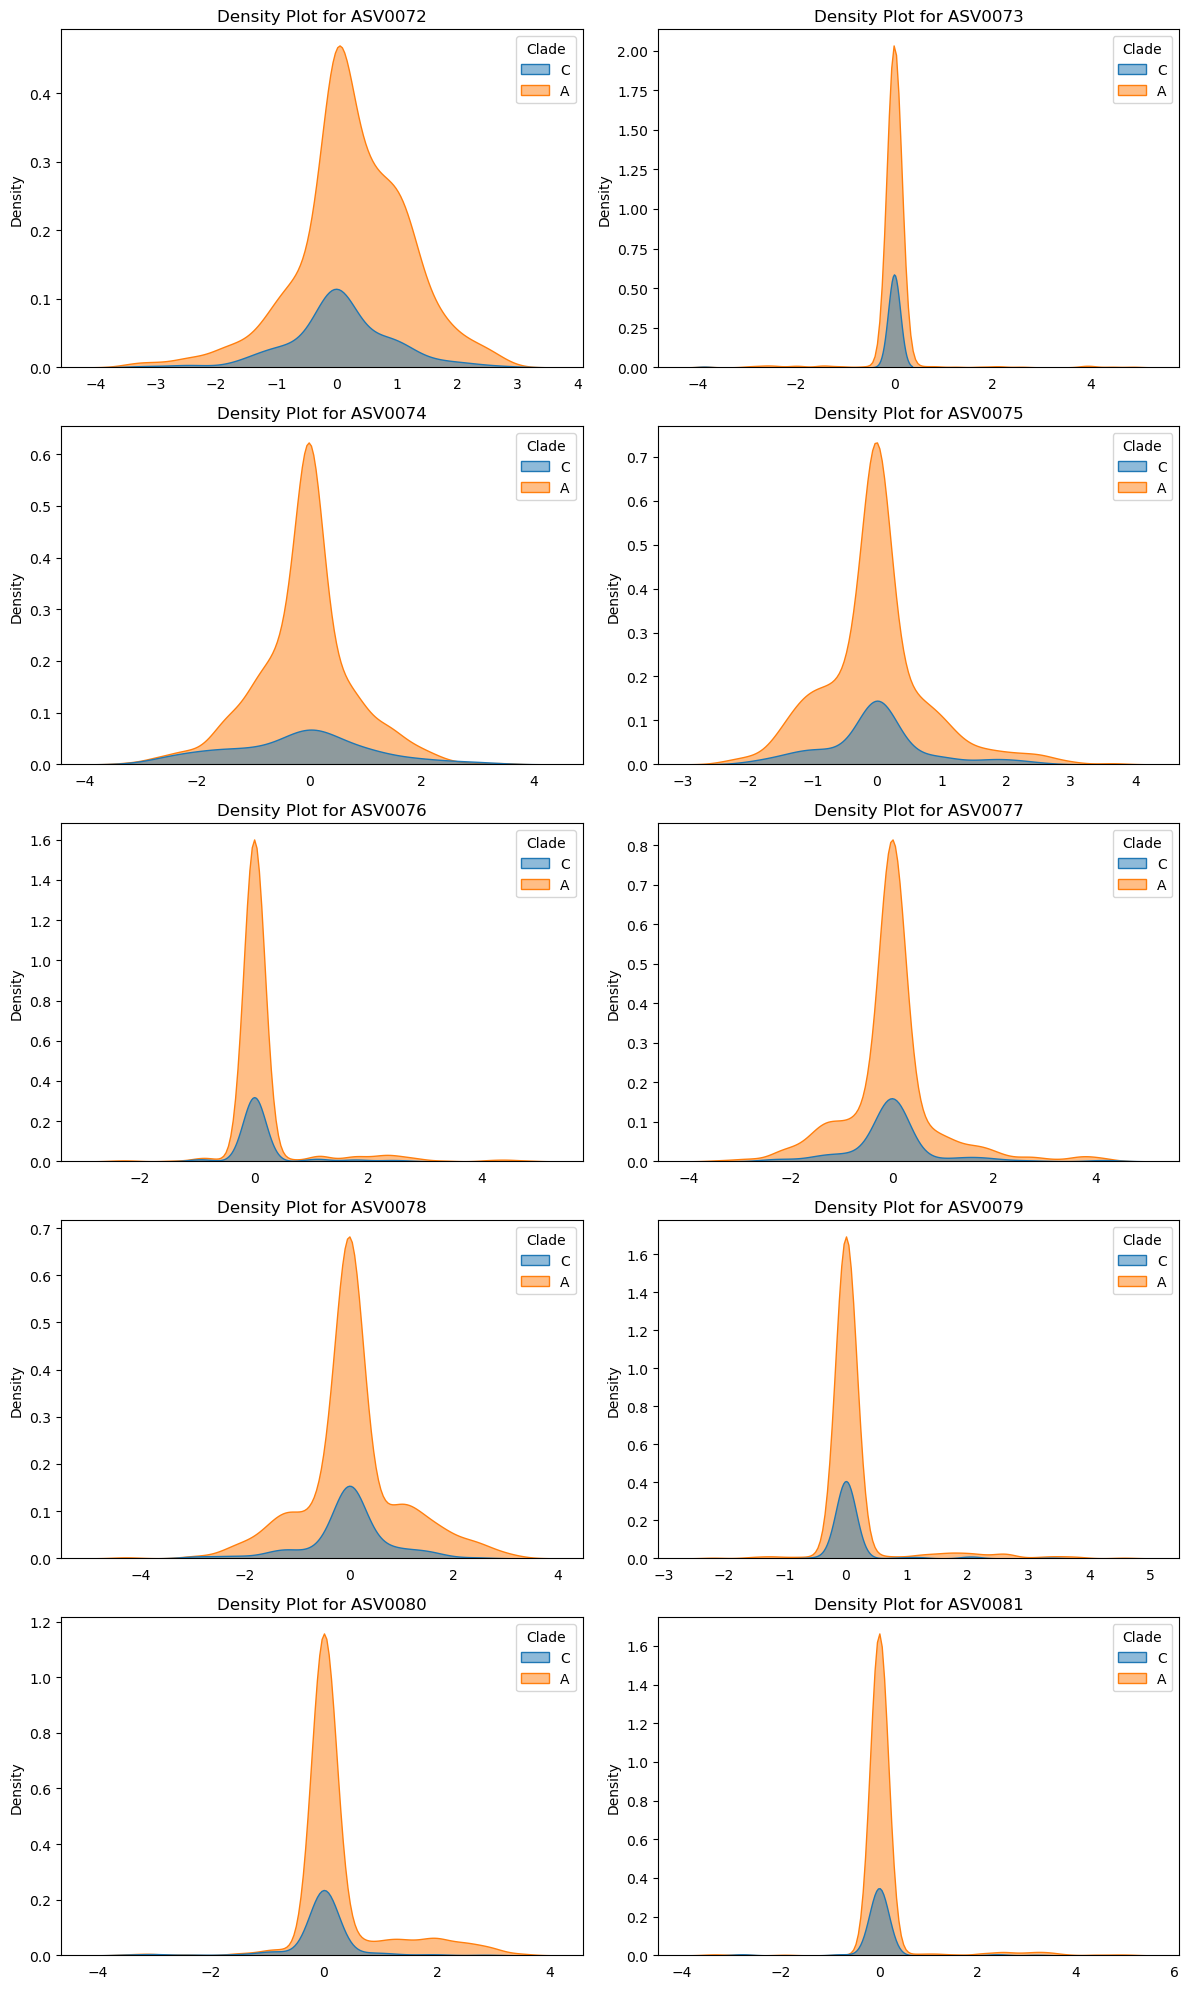

/Users/kasan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


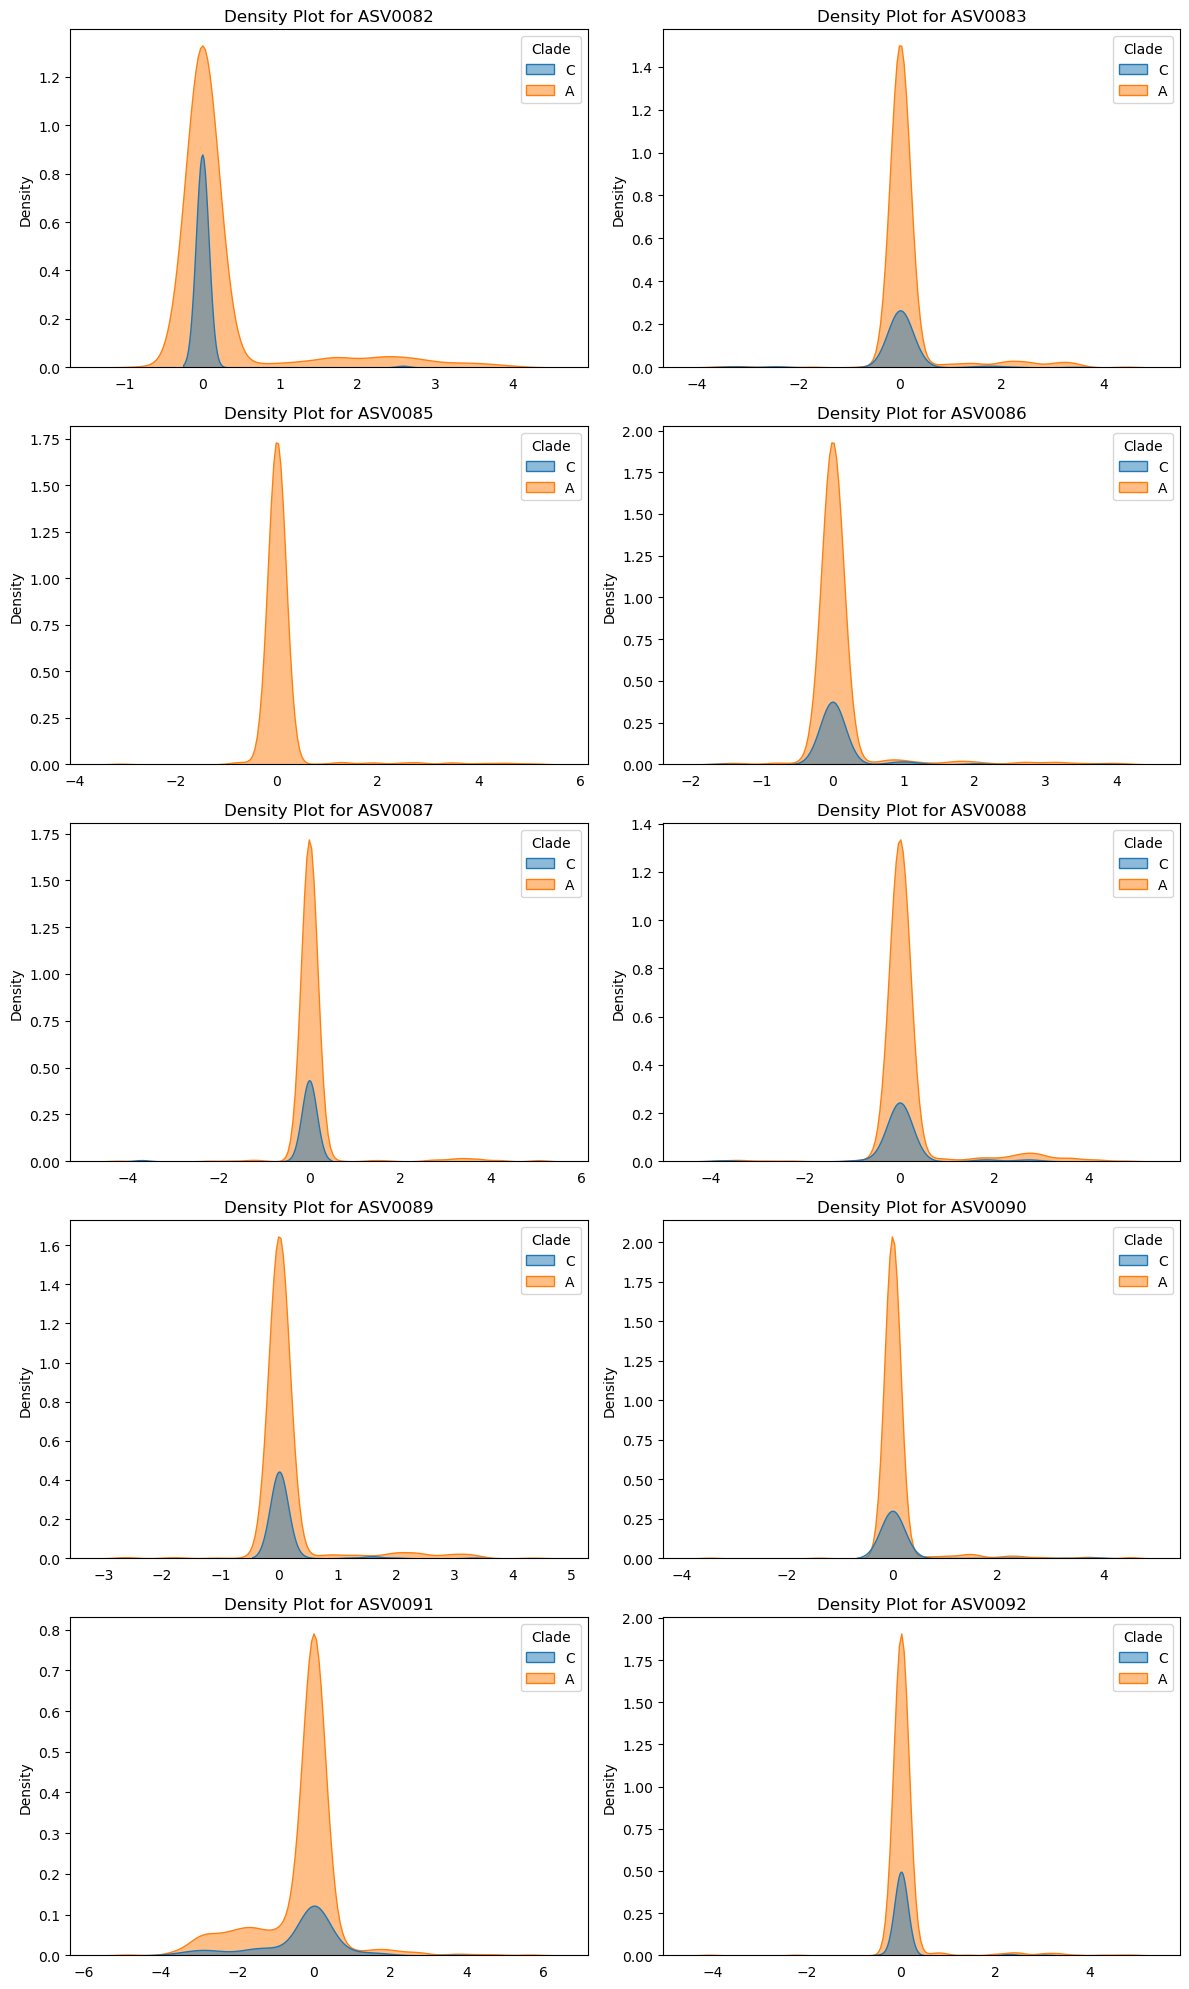

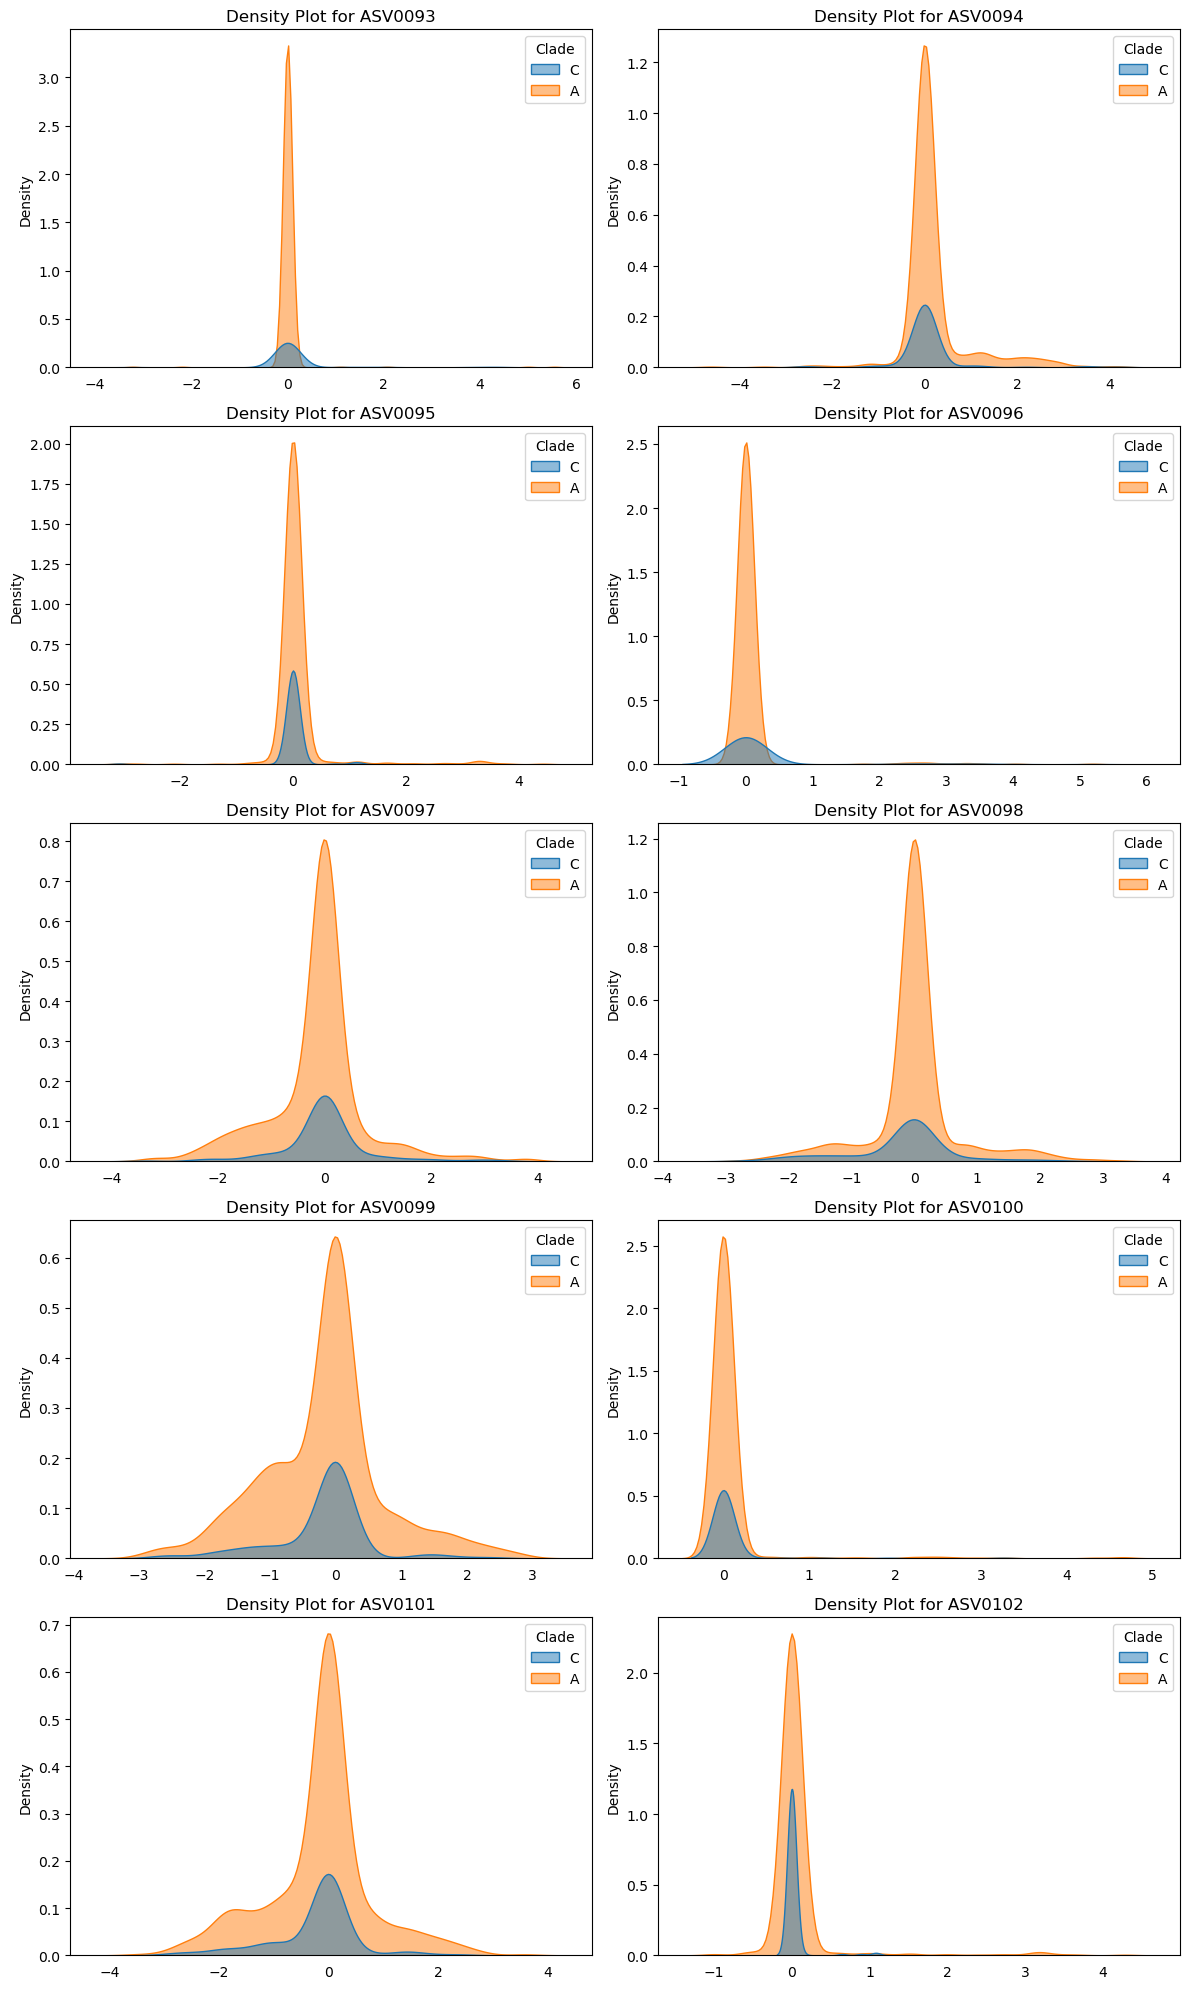

/Users/kasan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


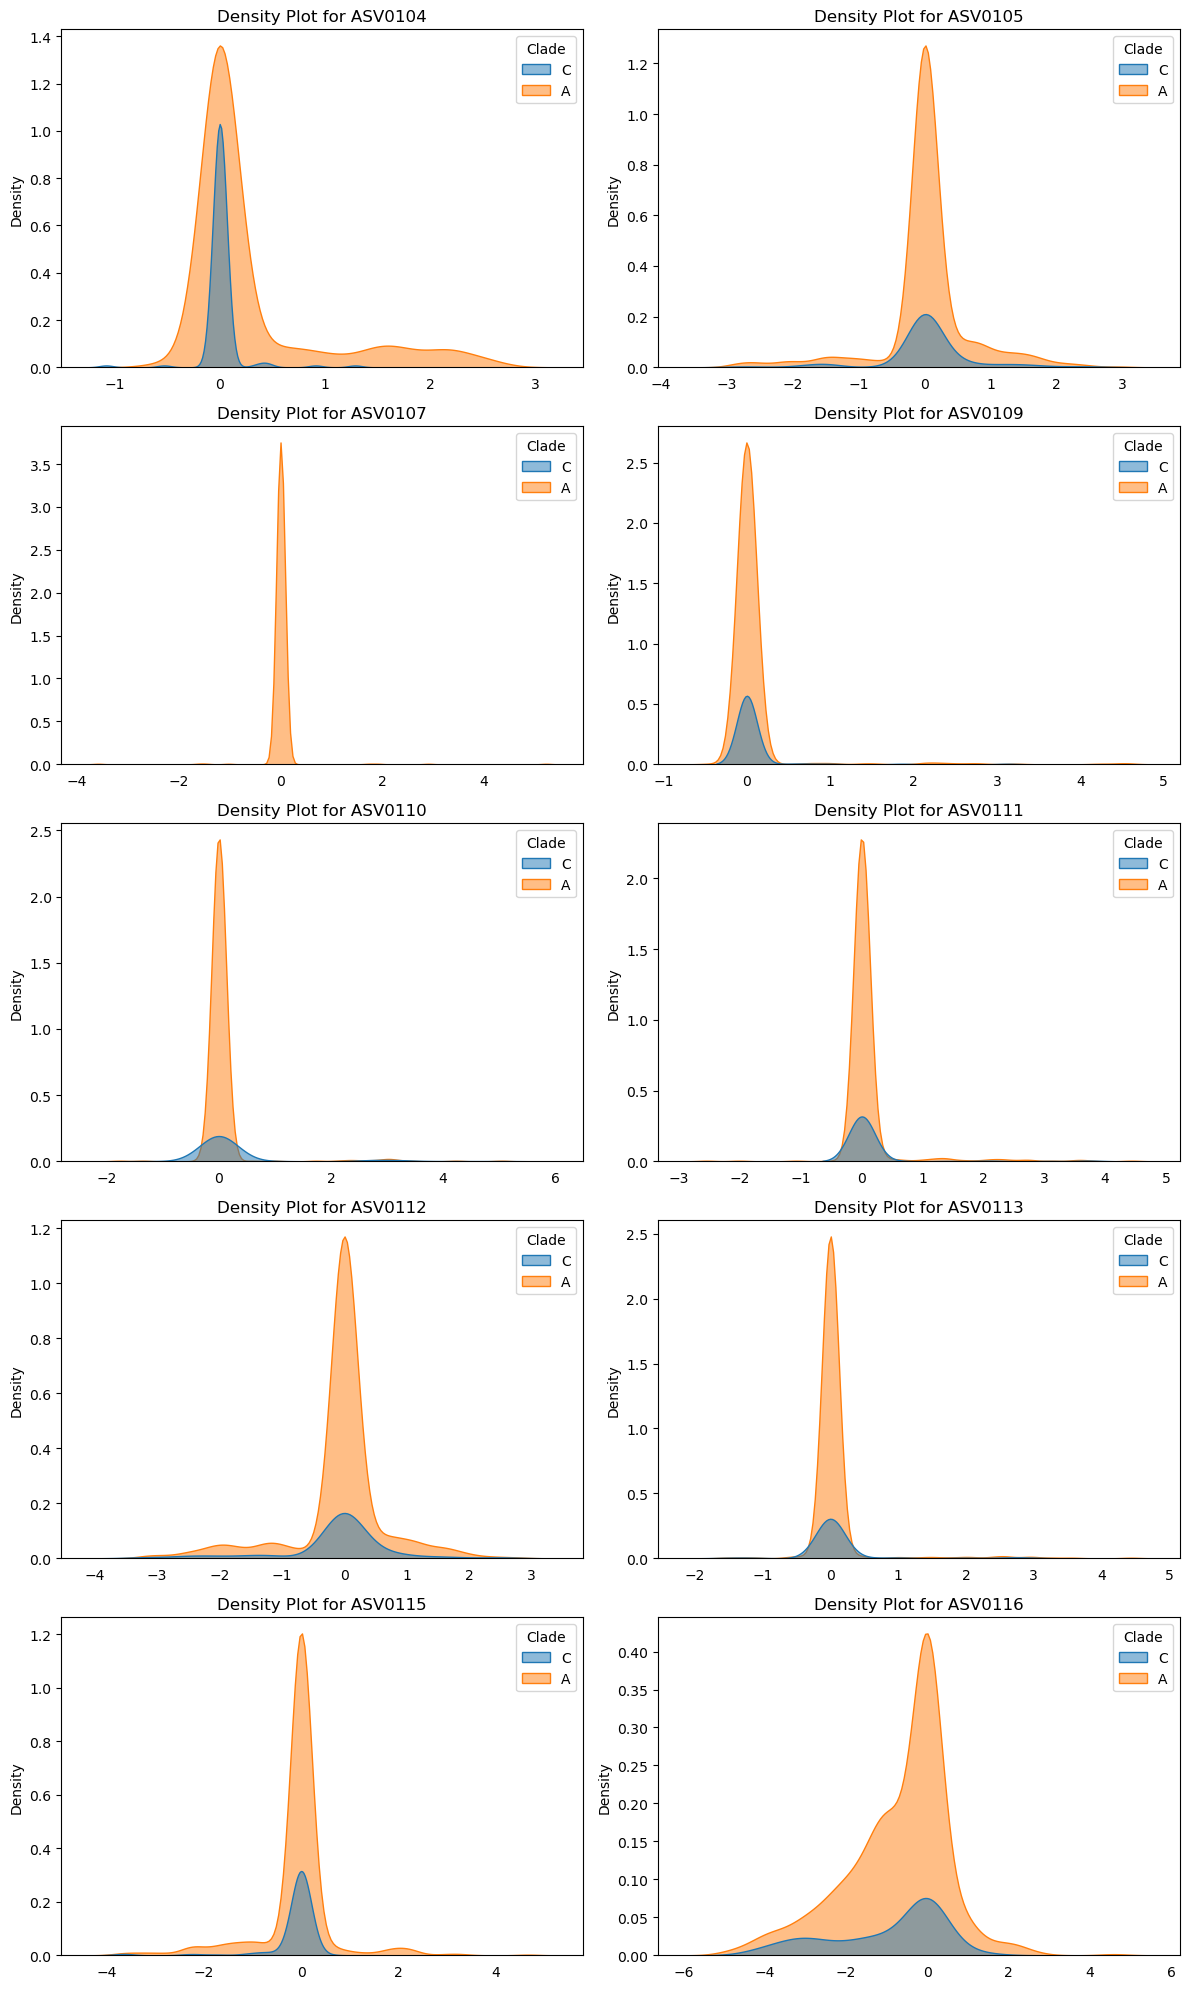

/Users/kasan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


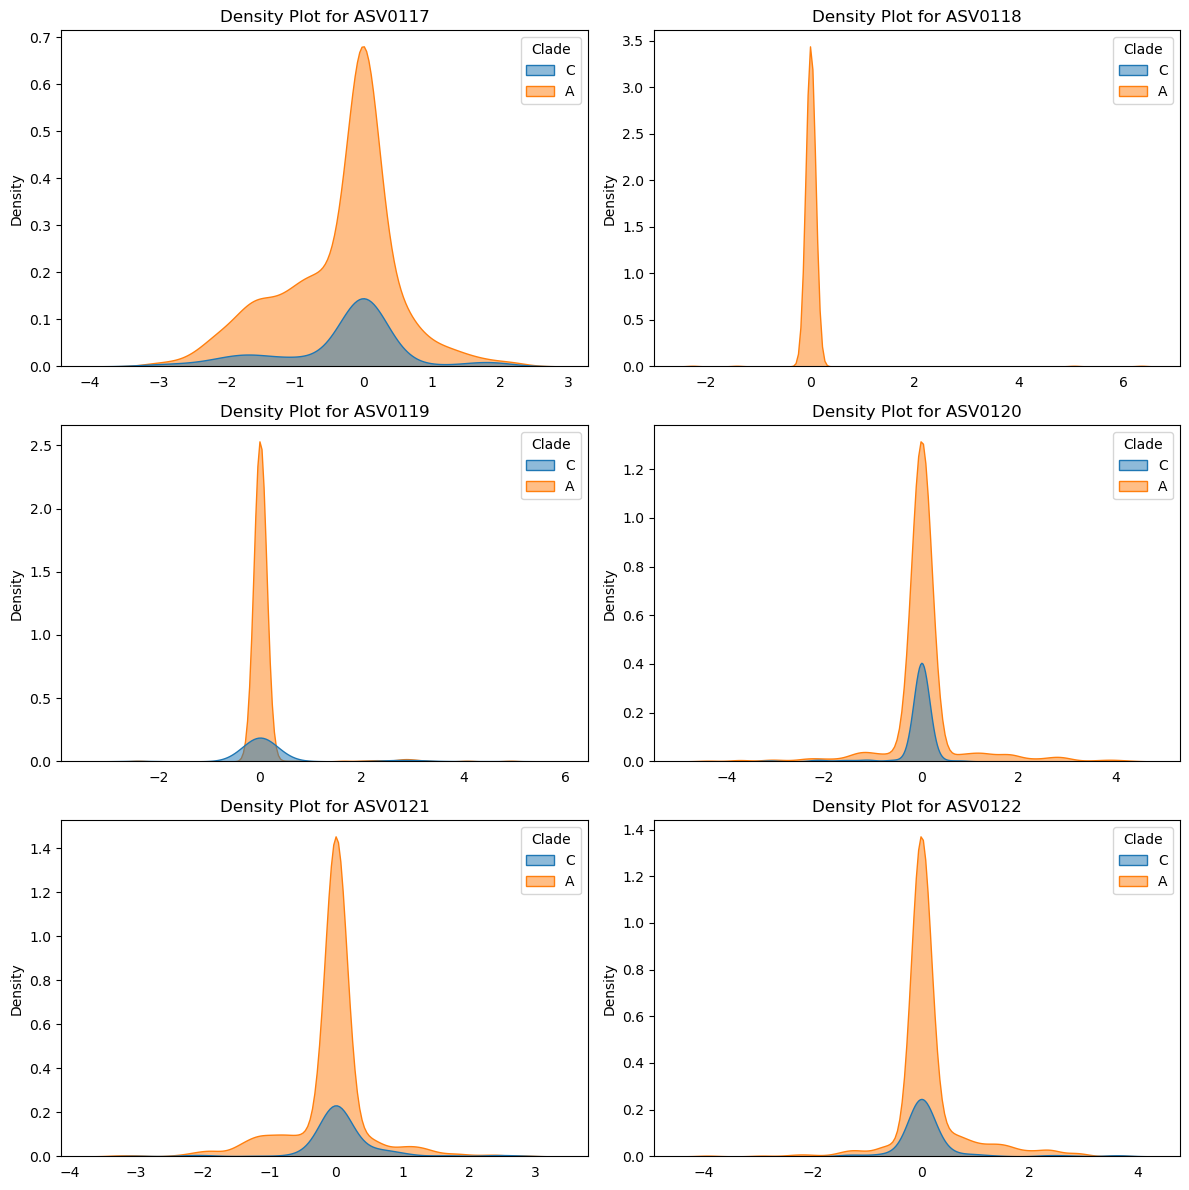

In [13]:
from math import ceil

# Create density plots in batches of 10 numeric columns
numeric_columns = ac_data.columns[8:114]
chunk_size = 10

# Calculate the number of batches needed
num_batches = ceil(len(numeric_columns) / chunk_size)

for batch in range(num_batches):
    start_idx = batch * chunk_size
    end_idx = (batch + 1) * chunk_size
    current_numeric_columns = numeric_columns[start_idx:end_idx]

    # Set up subplots
    num_plots = len(current_numeric_columns)
    num_rows = (num_plots // 2) + (num_plots % 2)
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 4*num_rows))

    # Flatten the 2D array of axes for easier iteration
    axes = axes.flatten()

    # Create density plots and arrange them in the grid
    for i, var in enumerate(current_numeric_columns):
        sns.kdeplot(data=ac_data, x=var, hue='Clade', fill=True, alpha=0.5, ax=axes[i])
        axes[i].set_title(f'Density Plot for {var}')
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='x', which='both', bottom=False, top=False)  # Remove x-axis ticks

    # Adjust layout
    plt.tight_layout()

    # Save the figure
    plt.savefig(f'../plots/grid_plots_batch_{batch + 1}.png')  # Adjust the file name as needed

    # Show the figure (optional)
    plt.show()